In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
Prem_transfers_19 = pd.read_csv("C:/Users/Melka/Downloads/premier League Transfers 19-20.csv")

In [2]:
# Exploring the data 
Prem_transfers_19.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020


In [3]:
# Checking for missing values in our data
for col in Prem_transfers_19.columns:
    missing_values = np.mean(Prem_transfers_19[col].isnull())
    print('{} - {}%'.format(col, missing_values))
    

club_name - 0.0%
player_name - 0.0%
age - 0.0%
position - 0.0%
club_involved_name - 0.0%
fee - 0.0%
transfer_movement - 0.0%
fee_cleaned - 0.1492007104795737%
league_name - 0.0%
year - 0.0%
season - 0.0%


In [4]:
# Column fee_cleaned has null values according to the above output
Prem_transfers_19['fee_cleaned'].unique()

array([63.   , 58.5  , 10.8  ,  7.2  ,  0.9  ,  0.   , 33.3  , 15.12 ,
        8.55 ,  3.6  ,  1.53 ,    nan,  1.71 , 19.98 ,  6.48 ,  6.3  ,
        2.43 ,  1.8  ,  0.45 , 40.5  , 90.   ,  9.   ,  8.1  ,  8.01 ,
        7.83 ,  4.5  ,  2.7  ,  0.585, 54.   , 24.3  , 14.4  ,  9.9  ,
       19.8  , 72.   , 27.   ,  6.03 , 27.36 ,  7.38 ,  3.15 ,  1.98 ,
        0.225, 78.3  , 49.5  , 15.3  ,  1.35 , 34.2  , 16.47 , 16.2  ,
       12.15 ,  8.28 ,  3.06 , 24.75 , 22.5  ,  2.25 , 14.13 ,  2.97 ,
       30.06 , 18.9  ,  0.27 , 36.   , 25.2  ,  6.98 ,  6.75 ,  2.07 ,
        0.747,  5.4  , 18.   ,  2.52 ,  0.675, 39.6  ,  4.86 ,  2.02 ,
       14.85 , 13.32 ,  4.01 , 20.07 ,  9.99 ,  0.99 ,  5.   ,  2.48 ,
        7.92 , 15.03 , 13.95 ,  5.04 ,  3.87 , 19.71 , 19.67 ,  3.51 ,
        1.62 ,  0.63 ,  0.302, 17.19 ,  7.02 , 11.97 ,  4.05 ])

In [5]:
# It is not neccessary for our project however we can clean the column by removing the rows with the nan value
Prem_transfers_19_fee_nan_removed = Prem_transfers_19[Prem_transfers_19['fee_cleaned'].isnull() == False]


In [6]:
# we can also take the mean of the column and replace the nan value
Prem_fee_mean = (Prem_transfers_19['fee_cleaned'].mean()).round(2)
Prem_fee_mean

4.47

In [7]:
# Replacing the nan values with mean of the column
Prem_transfers_19['fee_cleaned'].fillna(Prem_fee_mean, inplace = True)


In [8]:
# The nan value under 7.2 is changed to 4.47
Prem_transfers_19['fee_cleaned'].unique()

array([63.   , 58.5  , 10.8  ,  7.2  ,  0.9  ,  0.   , 33.3  , 15.12 ,
        8.55 ,  3.6  ,  1.53 ,  4.47 ,  1.71 , 19.98 ,  6.48 ,  6.3  ,
        2.43 ,  1.8  ,  0.45 , 40.5  , 90.   ,  9.   ,  8.1  ,  8.01 ,
        7.83 ,  4.5  ,  2.7  ,  0.585, 54.   , 24.3  , 14.4  ,  9.9  ,
       19.8  , 72.   , 27.   ,  6.03 , 27.36 ,  7.38 ,  3.15 ,  1.98 ,
        0.225, 78.3  , 49.5  , 15.3  ,  1.35 , 34.2  , 16.47 , 16.2  ,
       12.15 ,  8.28 ,  3.06 , 24.75 , 22.5  ,  2.25 , 14.13 ,  2.97 ,
       30.06 , 18.9  ,  0.27 , 36.   , 25.2  ,  6.98 ,  6.75 ,  2.07 ,
        0.747,  5.4  , 18.   ,  2.52 ,  0.675, 39.6  ,  4.86 ,  2.02 ,
       14.85 , 13.32 ,  4.01 , 20.07 ,  9.99 ,  0.99 ,  5.   ,  2.48 ,
        7.92 , 15.03 , 13.95 ,  5.04 ,  3.87 , 19.71 , 19.67 ,  3.51 ,
        1.62 ,  0.63 ,  0.302, 17.19 ,  7.02 , 11.97 ,  4.05 ])

In [9]:
Prem_transfers_19

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020
...,...,...,...,...,...,...,...,...,...,...,...
558,Aston Villa,Alan Hutton,34,Right-Back,Without Club,-,out,0.0,Premier League,2019,2019/2020
559,Aston Villa,Micah Richards,31,Right-Back,Retired,-,out,0.0,Premier League,2019,2019/2020
560,Aston Villa,Mark Bunn,34,Goalkeeper,Retired,-,out,0.0,Premier League,2019,2019/2020
561,Aston Villa,Birkir Bjarnason,31,Central Midfield,Without Club,-,out,0.0,Premier League,2019,2019/2020


In [12]:
# This step will filter out players that left the clubs
Transfers_In = Prem_transfers_19[Prem_transfers_19['transfer_movement']=='in']
Transfers_In

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020
...,...,...,...,...,...,...,...,...,...,...,...
541,Aston Villa,Matija Sarkic,22,Goalkeeper,Livingston FC,"End of loanMay 31, 2020",in,0.0,Premier League,2019,2019/2020
542,Aston Villa,Rushian Hepburn-Murphy,21,Centre-Forward,Tranmere Rovers,"End of loanMay 31, 2020",in,0.0,Premier League,2019,2019/2020
543,Aston Villa,Ritchie De Laet,30,Right-Back,Melbourne City,"End of loanJun 30, 2019",in,0.0,Premier League,2019,2019/2020
544,Aston Villa,Gary Gardner,27,Central Midfield,Birmingham,"End of loanJun 30, 2019",in,0.0,Premier League,2019,2019/2020


In [13]:
# Next step is to extract numbers from 'fee' column inorder to aggrigate final output
def extract_and_conditionally_divide(s):
    num_match = re.search(r'(\d+(\.\d+)?)\s*([kmKMB]*)', s)
    if num_match:
        number, _, suffix = num_match.groups()
        number = float(number)
        if suffix.lower() == 'k':
            return number / 1000
        elif suffix.lower() == 'm':
            return number * 1e6
        else:
            return 0
    else:
        return 0


In [14]:
# creating a new column with the extracted number
result = [extract_and_conditionally_divide(item) for item in 'fee']
Transfers_In['fee_clean'] = Transfers_In['fee'].apply(extract_and_conditionally_divide).round(2)


C:\Users\Melka\AppData\Local\Temp\ipykernel_7308\3444516942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transfers_In['fee_clean'] = Transfers_In['fee'].apply(extract_and_conditionally_divide).round(2)


In [16]:
pd.set_option('display.max_rows', None)
Transfers_In

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,fee_clean
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.000,Premier League,2019,2019/2020,63000000.00
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.500,Premier League,2019,2019/2020,58500000.00
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.800,Premier League,2019,2019/2020,10800000.00
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.800,Premier League,2019,2019/2020,10800000.00
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.200,Premier League,2019,2019/2020,7200000.00
5,Manchester City,Ryotaro Meshino,21,Attacking Midfield,Gamba Osaka,£900k,in,0.900,Premier League,2019,2019/2020,0.90
6,Manchester City,Scott Carson,33,Goalkeeper,Derby,Loan,in,0.000,Premier League,2019,2019/2020,0.00
7,Manchester City,Jack Harrison,23,Left Winger,Leeds,"End of loanMay 31, 2020",in,0.000,Premier League,2019,2019/2020,0.00
8,Manchester City,Tosin Adarabioyo,22,Centre-Back,Blackburn,"End of loanMay 31, 2020",in,0.000,Premier League,2019,2019/2020,0.00
9,Manchester City,Arijanet Muric,21,Goalkeeper,Nottm Forest,"End of loanMay 31, 2020",in,0.000,Premier League,2019,2019/2020,0.00


In [17]:
# Grouping the club names
grouped_clubs = Transfers_In.groupby('club_name')['fee_clean'].sum().reset_index()

In [18]:
# Final position at the end of the season
grouped_clubs['End_of_Season_Position'] = grouped_clubs['club_name'].map({
    'Liverpool FC': 1,
    'Manchester City': 2,
    'Manchester United': 3,
    'Chelsea FC': 4,
    'Leicester City': 5,
    'Tottenham Hotspur': 6,
    'Wolverhampton Wanderers': 7,
    'Arsenal FC': 8,
    'Sheffield United': 9,
    'Burnley FC': 10,
    'Southampton FC': 11,
    'Everton FC': 12,
    'Newcastle United': 13,
    'Crystal Palace': 14,
    'Brighton & Hove Albion': 15,
    'West Ham United': 16,
    'Aston Villa': 17,
    'AFC Bournemouth': 18,
    'Watford FC': 19,
    'Norwich City': 20,
})

In [19]:
grouped_clubs

,club_name,fee_clean,End_of_Season_Position
0,AFC Bournemouth,5.081000e+07,18
1,Arsenal FC,1.371600e+08,8
2,Aston Villa,1.337400e+08,17
3,Brighton & Hove Albion,6.089000e+07,15
4,Burnley FC,7.480001e+06,10
5,Chelsea FC,4.050000e+07,4
6,Crystal Palace,6.840000e+06,14
7,Everton FC,1.079100e+08,12
8,Leicester City,9.549000e+07,5
9,Liverpool FC,1.710000e+06,1


([<matplotlib.axis.XTick at 0x1c2a3117890>,
 [Text(18, 0, '18'),
  Text(8, 0, '8'),
  Text(17, 0, '17'),
  Text(15, 0, '15'),
  Text(10, 0, '10'),
  Text(4, 0, '4'),
  Text(14, 0, '14'),
  Text(12, 0, '12'),
  Text(5, 0, '5'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(13, 0, '13'),
  Text(20, 0, '20'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(6, 0, '6'),
  Text(19, 0, '19'),
  Text(16, 0, '16'),
  Text(7, 0, '7')])

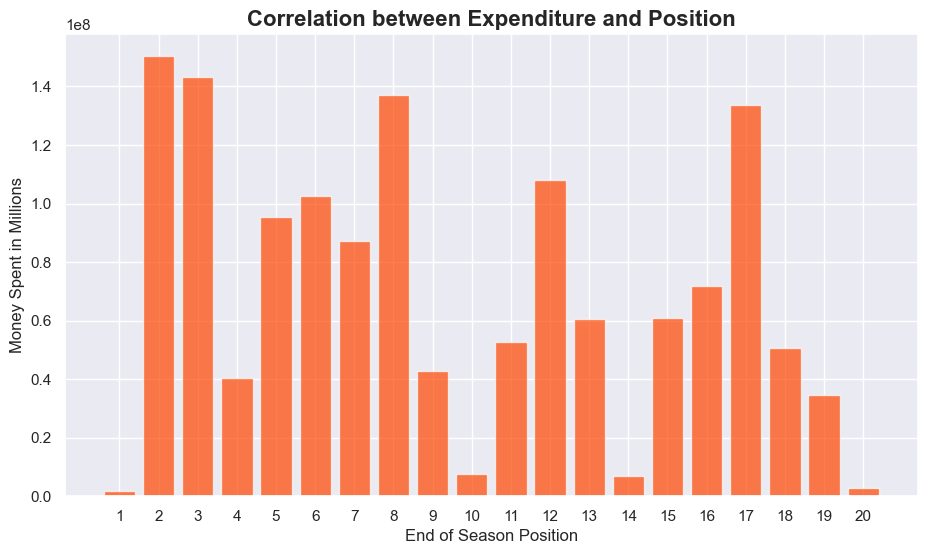

In [21]:
# Plot result
plt.figure(figsize=(11,6))
plt.bar(grouped_clubs['End_of_Season_Position'], grouped_clubs['fee_clean'], alpha=0.7, color ='orangered' )
plt.xlabel('End of Season Position')
plt.ylabel('Money Spent in Millions')
plt.title('Correlation between Expenditure and Position', fontweight = "bold", fontsize = 16)
plt.xticks(grouped_clubs['End_of_Season_Position'])